In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [15]:
def thresh_bw_image(img_path:str):
    """ 
    parameter:
    image(String) = path to image file (png, jpeg)

    return:
    bw_image(cv2.image_array/numpy_image_array)
    """
    image = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = image.copy()
    # img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5, 5), 0)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _, bw_image = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
    return bw_image,img_gray

def save_csv(center_dict:dict,csv_path:str):
    """_summary_

    Parameters
    ----------
    center_dict : dict
        _description_
    imags_path : str
        _description_
    """
    with open(csv_path, 'w', newline='') as f:
        # Create a CSV writer object
        writer = csv.writer(f)
        for row in center_dict.items():
            writer.writerow(row)    

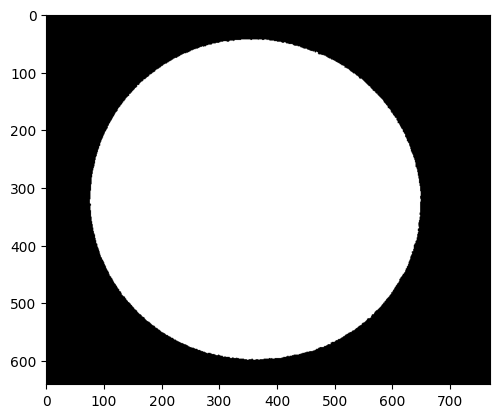

In [3]:
imags_path = "kwasi/left_bulb"
list_imgs = os.listdir(imags_path)
list_imgs = sorted(list_imgs)
n = 1

image_test = cv2.imread(os.path.join(imags_path,list_imgs[n]),cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, int(img_gray.mean()), img_gray.max(), 0)
edges = cv2.Canny(thresh,100,200)
plt.imshow(thresh,cmap="gray")
plt.show()

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

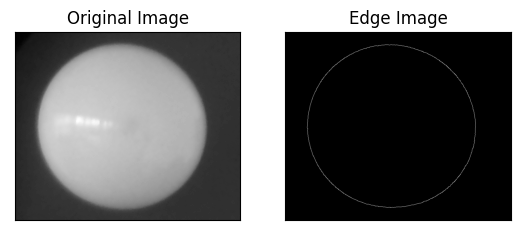

In [4]:
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

Bounding Box center:  (362.5, 321.5)


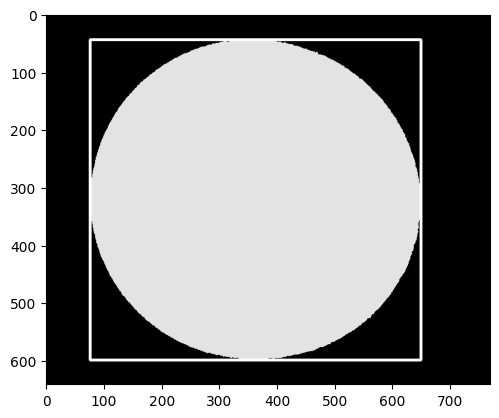

In [5]:
thresh = thresh.copy()
contours,_ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
r = cv2.boundingRect(cnt)
print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))

cv2.rectangle(thresh,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
plt.imshow(thresh, cmap="gray")
plt.show()

Center of Circle:  (362, 323)


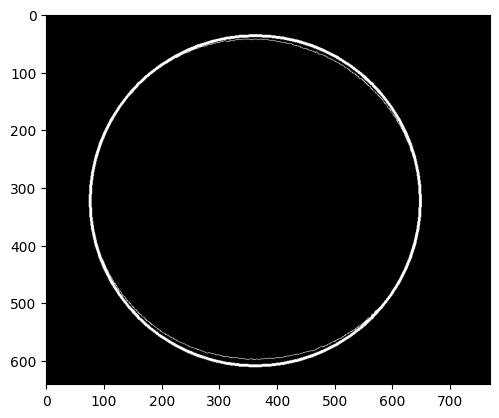

In [6]:
contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
print("Center of Circle: ",center)
radius = int(radius)
cv2.circle(edges,center,radius,(255,255,255),3)
plt.imshow(edges,cmap="gray")
plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

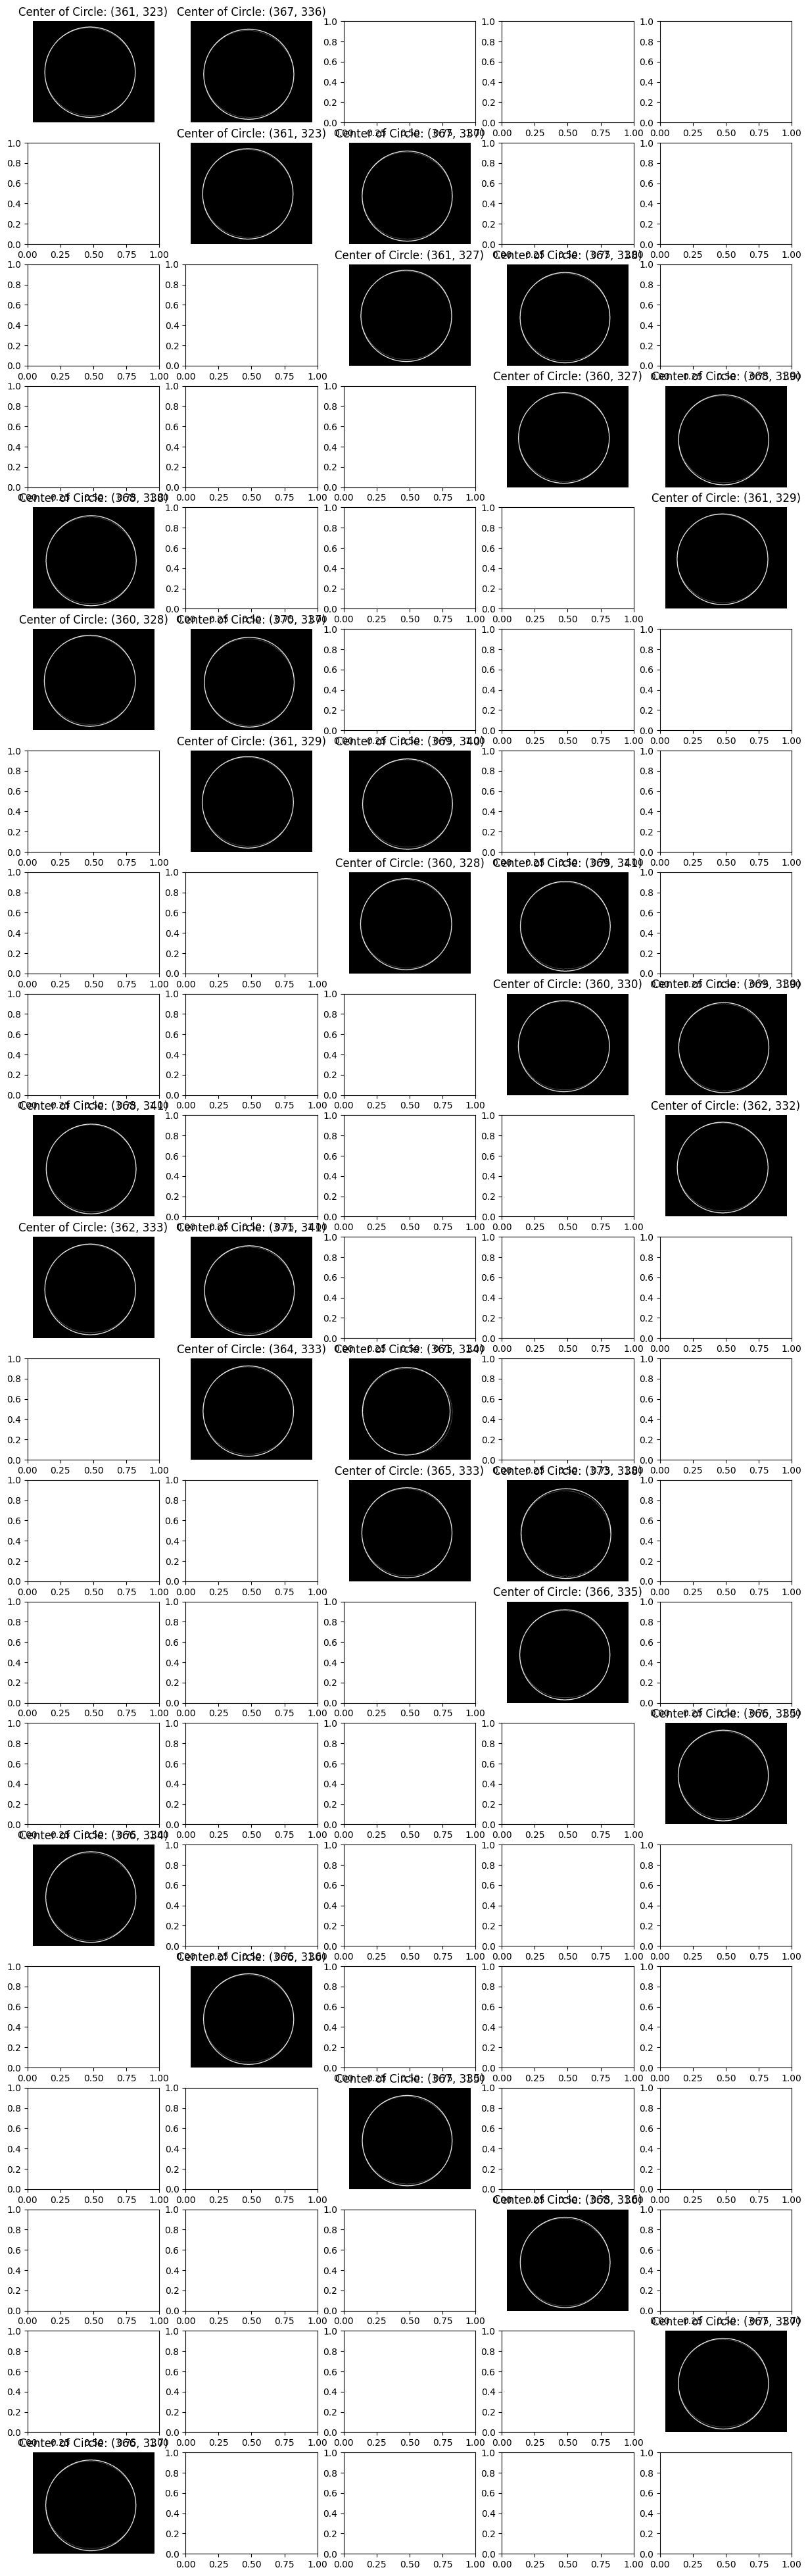

In [7]:
# Fitting circles using Canny edge detection images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))
center_dict_ced = {}

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    edges = cv2.Canny(bw_img,100,200)
    contours,_ = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    # print("Center of Circle: ",center)
    radius = int(radius)
    cv2.circle(edges,center,radius,(255,255,255),3)
    center_dict_ced[list_imgs[n+i]] = center


    axarr[i%img_row,i%img_cols].imshow(edges,cmap="gray")
            

    axarr[i%img_row,i%img_cols].axis("off")
    axarr[i%img_row,i%img_cols].set_title("Center of Circle: {}".format(center))

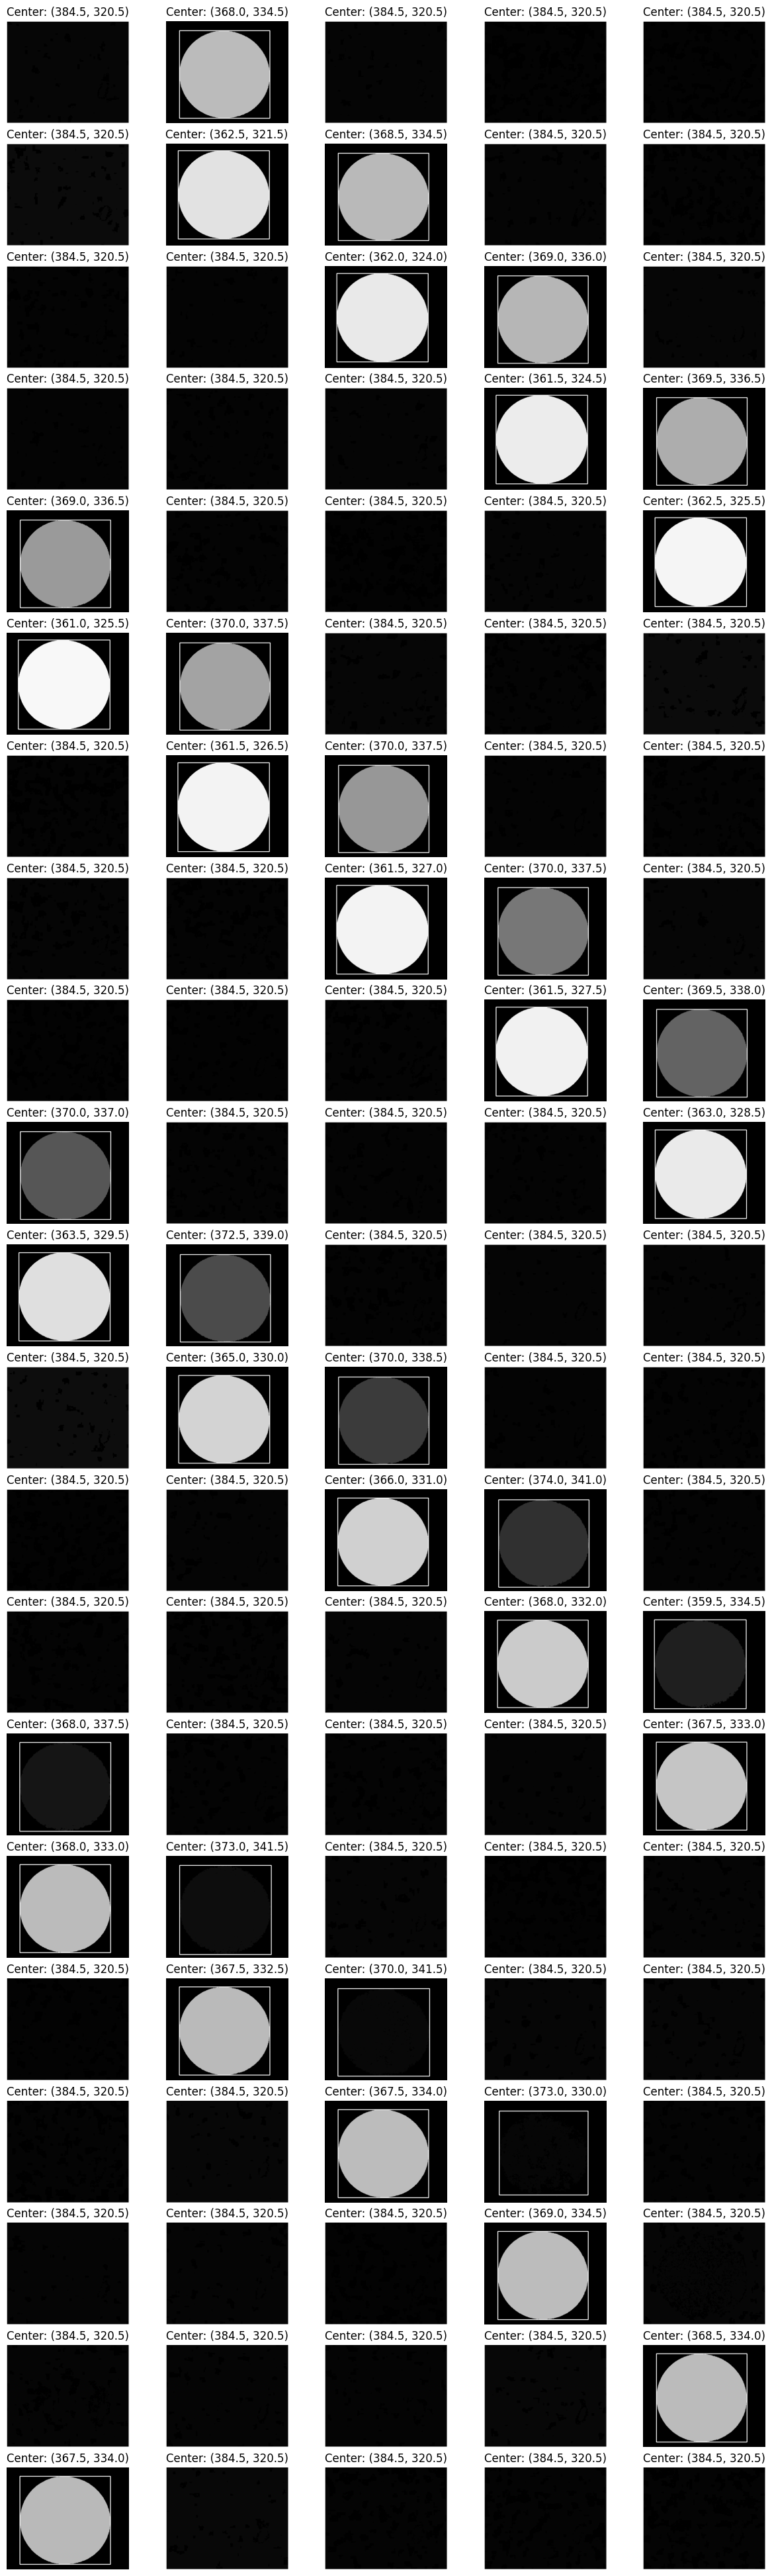

In [16]:
# Bounding box using Black&White images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0
center_bb_dect = {}

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)

    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
    r = cv2.boundingRect(cnt)
    center = (r[0]+0.5*r[2], r[1]+0.5*r[3])
    # print("Bounding Box center: ", (r[0]+0.5*r[2], r[1]+0.5*r[3]))
    cv2.rectangle(bw_img,(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(255,255,255),3)
    center_bb_dect[list_imgs[n+i]] = center

    axarr[i%img_row,i%img_cols].imshow(bw_img,cmap="gray")
            

    axarr[i%img_row,i%img_cols].axis("off")
    axarr[i%img_row,i%img_cols].set_title("Center: {}".format(center))

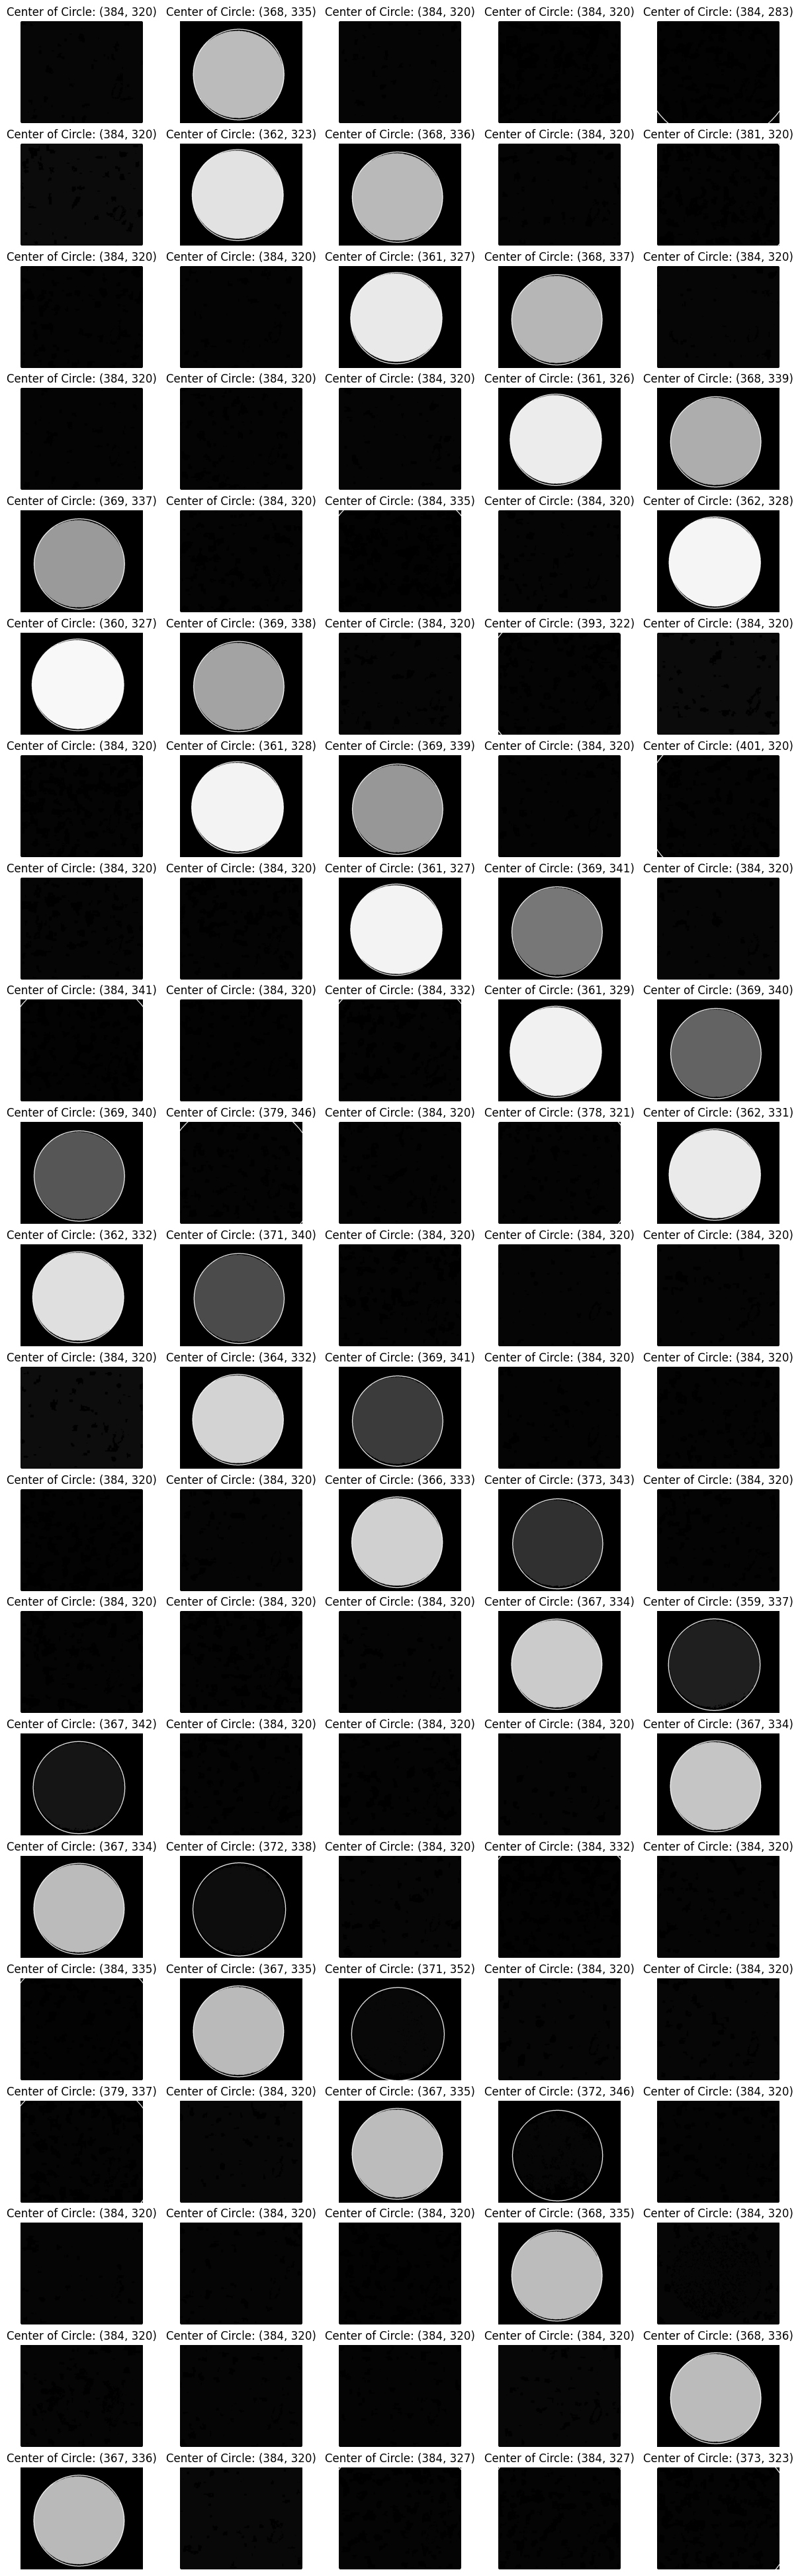

In [9]:
# Fitting circles using Black&White images as input
img_row = int(len(list_imgs)/5)
img_cols = 5
# Load image 
n = 0
center_fix_circle = {}

f, axarr = plt.subplots(img_row,img_cols,figsize=(15, img_cols*10))

for i in range(len(list_imgs)):
    bw_img, img_gray = thresh_bw_image(os.path.join(imags_path,list_imgs[n+i]))
    contours,_ = cv2.findContours(bw_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    areas = [cv2.contourArea(c) for c in contours]
    sorted_areas = np.sort(areas)
    cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour

    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    # print("Center of Circle: ",center)
    radius = int(radius)
    cv2.circle(bw_img,center,radius,(255,255,255),3)
    center_fix_circle[list_imgs[n+i]] = center

    axarr[i%img_row,i%img_cols].imshow(bw_img,cmap="gray")
            

    axarr[i%img_row,i%img_cols].axis("off")
    axarr[i%img_row,i%img_cols].set_title("Center of Circle: {}".format(center))

In [10]:
save_csv(center_dict_ced,"Canny_edge_center.csv")
save_csv(center_bb_dect,"Bounding_box_center.csv")
save_csv(center_fix_circle,"Fit_circle_center.csv")

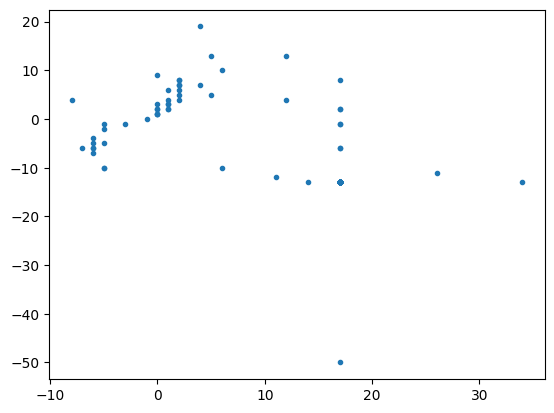

In [11]:
a = list(center_fix_circle.values())
np_a = np.array(a, dtype=object)


plt.plot(np_a[:,0]-367,np_a[:,1]-333,'.')

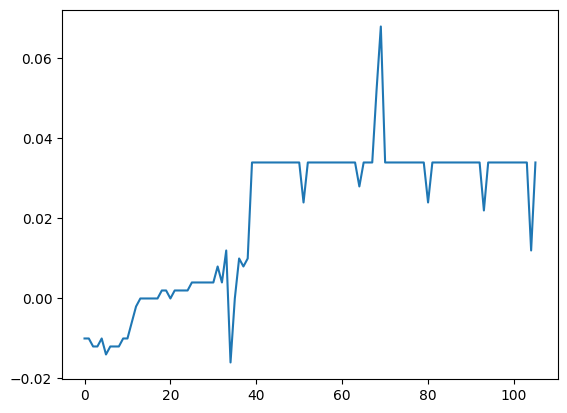

In [12]:
plt.plot(np.arange(0,np_a.shape[0]),0.002*(np_a[:,0]-367),)